In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_biclusters

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.linalg import norm

# Kernel Density Estimation

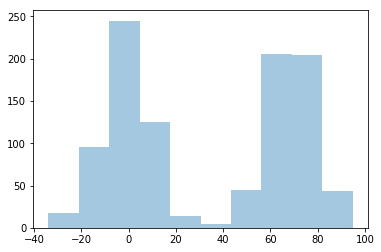

In [121]:
data =  make_biclusters((1000,1), 2, noise=10, random_state=31415)[0].ravel()
sns.distplot(data, kde=False)

In [57]:
def K(u): return np.all(np.abs(u) <= 1/2, axis=0)

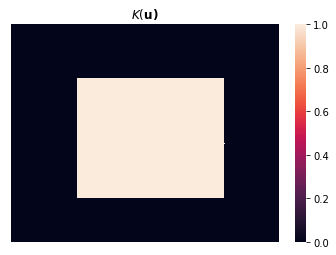

In [52]:
XG = np.mgrid[-1:1:0.1, -1:1:0.1]
sns.heatmap(np.apply_along_axis(K, 0, XG), xticklabels=False, yticklabels=False);
plt.title(r"$K(\bf{u})$");

In [311]:
def K(u, axis=0): return np.all(np.abs(u) <= 1/2, axis=axis)

def p1(x, X, h):
    """
    KDE under a parzen window
    """
    N, D = X.shape
    xden, _ = x.shape
    
    u = ((x - X.T) / h).reshape(D, xden, N)
    ku = K(u).sum(axis=1) / (N * h ** D)
    return ku

def p2(x, X, h):
    """
    KDE under a gaussian kernel
    """
    N, D = X.shape
    xden, _ = x.shape
    
    u = ((x - X.T)).reshape(D, xden, N)
    u = norm(u, axis=0) ** 2 / (2 * h ** 2)
    px = np.exp(-u).sum(axis=1) / (N * np.sqrt(2 * np.pi * h ** 2))
    return px

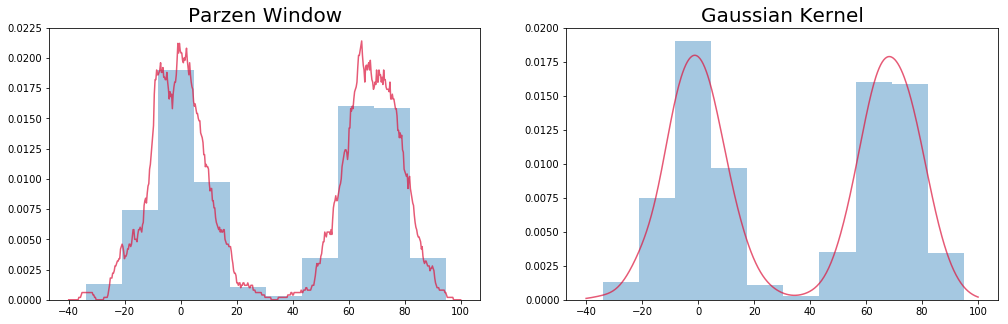

In [331]:
xv = np.linspace(-40, 100, 500).reshape(-1, 1)
data = data.reshape(-1, 1)

fig, ax = plt.subplots(1, 2, figsize=(17, 5))

sns.distplot(data, kde=False, norm_hist=True, ax=ax[0])
sns.distplot(data, kde=False, norm_hist=True, ax=ax[1])
ax[0].plot(xv, p1(xv, data, 5), c="crimson", alpha=0.7)
ax[1].plot(xv, p2(xv, data, 5), c="crimson", alpha=0.7)

ax[0].set_title("Parzen Window", size=20)
ax[1].set_title("Gaussian Kernel", size=20);